<a href="https://colab.research.google.com/github/pierandreamorelli/stage/blob/main/cs_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scaletta
# Pipeline 1 - Data Preparation
1.   Caricare DF: PY, PPY
2.   Concatenare AN con PY, PPY
3.   Eliminare colonne duplicate (Pandas)
4.   Identificare colonne che hanno un solo valore e dropparle
5. Identificare colonne categoriche
6. Fare encoding one-hot per colonne categoriche
7. Identificare colonne numeriche
8. Fare re-scaling e normalizzare colonne numeriche
9. Gestire valori NaN

# Pipeline 2 - Training
1.   Identificare la Y (colonna target, presa da df_LY) 
2.   Opzionale: passare anche la Y nella data preparation 
3. Attaccare Y a df_res 
4. split train e test (80%, 20%)
5. identificare due/quattro modelli 
6. identificare le metriche di valutazione
7. effettuare il training dei modelli
8. valutarne le performance 



# Pipeline 1 - Data Preparation

1. **Upload DataFrame**

In [2]:
import pandas as pd

df_AN = pd.read_csv('/content/drive/MyDrive/dataset/cs_search.csv')
df_LY = pd.read_csv('/content/drive/MyDrive/dataset/cs_fs_lastyear.csv')
df_PY = pd.read_csv('/content/drive/MyDrive/dataset/cs_fs_prevyear.csv')
df_PPY = pd.read_csv('/content/drive/MyDrive/dataset/cs_fs_prevprevyear.csv')



In [3]:
df_AN.set_index('id')

,index,Unnamed: 0,country,regNo,vatNo,safeNo,name,status,officeType,type,dateOfLatestAccounts,dateOfLatestChange,phoneNumbers,activityCode,address.simpleValue,address.street,address.city,address.postCode,address.province,address.houseNo
id,,,,,,,,,,,,,,,,,,,,
IT-0-RM1339740,0,0,IT,RM1339740,"['11958401009', '11958401009']",IT03782942,COOPERATIVA SOCIALE DI PSICOTERAPIA MEDICA - S...,active,headOffice,Ltd,2020-12-31T00:00:00.000000Z,2022-05-16T21:24:18.000Z,['0688817631'],86903.0,"VIA FEDERICO ROSAZZA, 58, ROMA, 00153, RM",VIA FEDERICO ROSAZZA,ROMA,153.0,RM,58
IT-0-RM1174612,1,0,IT,RM1174612,"['09598861004', '09598861004']",IT03687197,ENI TRADING & SHIPPING S.P.A. - IN LIQUIDAZIONE,active,headOffice,Ltd,2020-12-31T00:00:00.000000Z,2022-04-20T17:08:07.000Z,['0659821'],4671.0,"PLE ENRICO MATTEI, 1, ROMA, 00144, RM",PLE ENRICO MATTEI,ROMA,144.0,RM,1
IT-0-RM936646,2,0,IT,RM936646,"['05918271007', '05918271007']",IT03629604,ENEL GLOBAL TRADING S.P.A.,active,headOffice,Ltd,2020-12-31T00:00:00.000000Z,2022-06-01T13:39:12.000Z,"['0685094393', '0683051']",4671.0,"VLE REGINA MARGHERITA, 125, ROMA, 00198, RM",VLE REGINA MARGHERITA,ROMA,198.0,RM,125
IT-0-RM14830,3,0,IT,RM14830,"['00473410587', '00902231000']",IT03514961,ESSO ITALIANA S.R.L.,active,headOffice,Ltd,2020-12-31T00:00:00.000000Z,2022-04-14T17:57:45.000Z,['06602921'],4671.0,"VLE CASTELLO DELLA MAGLIANA, 25, ROMA, 00148, RM",VLE CASTELLO DELLA MAGLIANA,ROMA,148.0,RM,25
IT-0-RM986948,4,0,IT,RM986948,"['06741351008', '06741351008']",IT03677379,LOGISTA ITALIA S.P.A.,active,headOffice,Ltd,2021-09-30T00:00:00.000000Z,2022-06-14T11:19:34.000Z,['800188800'],4635.0,"VIA VALADIER, 37, ROMA, 00193, RM",VIA VALADIER,ROMA,193.0,RM,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IT-0-VR176258,447,0,IT,VR176258,"['03748120155', '01364640233']",IT04337275,W.L. GORE & ASSOCIATI S.R.L. CON SIGLA GORE S....,active,headOffice,Ltd,2021-03-31T00:00:00.000000Z,2022-05-19T18:51:12.000Z,['0456209111'],467502.0,"VIA ENRICO FERMI, 2/4, VERONA, 37135, VR",VIA ENRICO FERMI,VERONA,37135.0,VR,2/4
IT-0-TV325949,448,0,IT,TV325949,"['04139540266', '04139540266']",IT04144355,LCI - LAVORAZIONE CARTA RICICLATA ITALIANA S.R.L.,active,headOffice,Ltd,2020-12-31T00:00:00.000000Z,2022-06-10T12:10:04.000Z,['0422693111'],46772.0,"VLE DELLA REPUBBLICA, 193/B, TREVISO, 31100, TV",VLE DELLA REPUBBLICA,TREVISO,31100.0,TV,193/B
IT-0-VR440192,449,0,IT,VR440192,"['04679180234', '04679180234']",IT16608844,SVAI S.R.L.,active,headOffice,Ltd,2021-12-31T00:00:00.000000Z,2022-06-01T21:10:41.000Z,['0458581684'],46742.0,"VIA DELL'ARTIGIANATO, 58, CASELLE, SOMMACAMPAG...",VIA DELL'ARTIGIANATO,SOMMACAMPAGNA,37066.0,VR,58


In [4]:
df_LY.set_index('companyId')

,index,type,yearEndDate,currency,consolidatedAccounts,profitAndLoss.revenue,profitAndLoss.operatingCosts,profitAndLoss.operatingProfit,profitAndLoss.wagesAndSalaries,profitAndLoss.depreciation,...,profitAndLoss.pensionCosts,balanceSheet.landAndBuildings,balanceSheet.plantAndMachinery,balanceSheet.goodwill,balanceSheet.investments,balanceSheet.rawMaterials,balanceSheet.finishedGoods,balanceSheet.totalInventories,balanceSheet.tradePayablesDueAfter1Year,ratios.stockTurnoverRatio
companyId,,,,,,,,,,,,,,,,,,,,,
IT-0-RM1339740,0,GlobalFinancialsGGS,2020-12-31T00:00:00Z,EUR,False,512354,489130,23224,55995.0,1454.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT-0-RM1174612,0,GlobalFinancialsGGS,2020-12-31T00:00:00Z,EUR,False,16670667412,16374099231,296568181,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT-0-RM936646,0,GlobalFinancialsGGS,2020-12-31T00:00:00Z,EUR,False,13175549443,12903185000,272364443,NaN,NaN,...,NaN,NaN,NaN,NaN,1.970781e+07,146462584.0,NaN,146462584.0,NaN,1.11
IT-0-RM14830,0,GlobalFinancialsGGS,2020-12-31T00:00:00Z,EUR,False,7748650921,7972075317,-223424396,40016022.0,8171857.0,...,1470308.0,15024796.0,79109991.0,0.0,1.321276e+09,139243981.0,219857804.0,359101785.0,NaN,4.63
IT-0-RM986948,0,GlobalFinancialsGGS,2021-09-30T00:00:00Z,EUR,False,3550318670,3455611488,94707182,26372632.0,4528953.0,...,NaN,6329331.0,11266641.0,NaN,3.761600e+06,NaN,402568213.0,402568213.0,NaN,11.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IT-0-VR414736,0,GlobalFinancialsGGS,2021-03-31T00:00:00Z,EUR,False,76499165,68270939,8228226,10499498.0,129476.0,...,188151.0,NaN,529.0,NaN,NaN,NaN,18616079.0,18616079.0,NaN,24.34
IT-0-VI118159,0,GlobalFinancialsGGS,2020-12-31T00:00:00Z,EUR,False,76873258,74694404,2178854,1119661.0,112087.0,...,3070.0,NaN,NaN,NaN,2.540700e+04,NaN,11639.0,11639.0,NaN,0.02
IT-0-RO131573,0,GlobalFinancialsGGS,2021-12-31T00:00:00Z,EUR,False,94361223,87714781,6646442,9011152.0,778276.0,...,NaN,13462006.0,379522.0,4196164.0,NaN,62628.0,14660061.0,14722689.0,NaN,15.60


In [5]:
df_PY.set_index('companyId')

,index,type,yearEndDate,currency,consolidatedAccounts,profitAndLoss.revenue,profitAndLoss.operatingCosts,profitAndLoss.operatingProfit,profitAndLoss.wagesAndSalaries,profitAndLoss.depreciation,...,profitAndLoss.pensionCosts,balanceSheet.landAndBuildings,balanceSheet.plantAndMachinery,balanceSheet.goodwill,balanceSheet.investments,balanceSheet.rawMaterials,balanceSheet.finishedGoods,balanceSheet.totalInventories,balanceSheet.tradePayablesDueAfter1Year,ratios.stockTurnoverRatio
companyId,,,,,,,,,,,,,,,,,,,,,
IT-0-RM1339740,1,GlobalFinancialsGGS,2019-12-31T00:00:00Z,EUR,False,614038,698143,-84105.0,90369.0,4280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT-0-RM1174612,1,GlobalFinancialsGGS,2019-12-31T00:00:00Z,EUR,False,30705465469,30335678705,369786764.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.829930e+07,264663400.0,0.0,264663400.0,0.0,0.86
IT-0-RM936646,1,GlobalFinancialsGGS,2019-12-31T00:00:00Z,EUR,False,24943890221,24973518519,-29628298.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.539921e+07,208742104.0,NaN,208742104.0,NaN,0.84
IT-0-RM14830,1,GlobalFinancialsGGS,2019-12-31T00:00:00Z,EUR,False,12200405360,12139836577,60568783.0,39683861.0,7606488.0,...,1502932.0,14974622.0,74574803.0,0.0,1.321305e+09,100308081.0,305914896.0,406222977.0,NaN,3.33
IT-0-RM986948,1,GlobalFinancialsGGS,2020-09-30T00:00:00Z,EUR,False,3086895079,2997171700,89723379.0,23259706.0,4166502.0,...,NaN,6396066.0,11028383.0,NaN,7.616000e+05,NaN,330327581.0,330327581.0,NaN,10.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IT-0-VR414736,1,GlobalFinancialsGGS,2020-03-31T00:00:00Z,EUR,False,88904190,81760423,7143767.0,10390773.0,120342.0,...,173939.0,NaN,1053.0,NaN,NaN,NaN,17612905.0,17612905.0,NaN,19.81
IT-0-VI118159,1,GlobalFinancialsGGS,2019-12-31T00:00:00Z,EUR,False,77806999,75701523,2105476.0,985166.0,101472.0,...,3044.0,NaN,NaN,NaN,2.540700e+04,NaN,65047.0,65047.0,NaN,0.08
IT-0-RO131573,1,GlobalFinancialsGGS,2020-12-31T00:00:00Z,EUR,False,73784268,71350020,2434248.0,7947948.0,785412.0,...,NaN,13511288.0,562235.0,5596164.0,NaN,54142.0,13546748.0,13600890.0,NaN,18.43


In [6]:
df_PPY.set_index('companyId')

,index,type,yearEndDate,currency,consolidatedAccounts,profitAndLoss.revenue,profitAndLoss.operatingCosts,profitAndLoss.operatingProfit,profitAndLoss.wagesAndSalaries,profitAndLoss.depreciation,...,profitAndLoss.pensionCosts,balanceSheet.landAndBuildings,balanceSheet.plantAndMachinery,balanceSheet.goodwill,balanceSheet.investments,balanceSheet.rawMaterials,balanceSheet.finishedGoods,balanceSheet.totalInventories,balanceSheet.tradePayablesDueAfter1Year,ratios.stockTurnoverRatio
companyId,,,,,,,,,,,,,,,,,,,,,
IT-0-RM1339740,2,GlobalFinancialsGGS,2018-12-31T00:00:00Z,EUR,False,8.535930e+05,8.571400e+05,-3547.0,85026.0,4482.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IT-0-RM1174612,2,GlobalFinancialsGGS,2018-12-31T00:00:00Z,EUR,False,3.345701e+10,3.340370e+10,53310633.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.829930e+07,589247430.0,0.0,589247430.0,0.0,1.76
IT-0-RM936646,2,GlobalFinancialsGGS,2018-12-31T00:00:00Z,EUR,False,1.845024e+10,1.852284e+10,-72602797.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.783080e+07,265881887.0,NaN,265881887.0,NaN,1.44
IT-0-RM14830,2,GlobalFinancialsGGS,2018-12-31T00:00:00Z,EUR,False,1.419495e+10,1.443629e+10,-241338356.0,84972345.0,9317527.0,...,3060878.0,18442937.0,86190443.0,0.0,1.320406e+09,131536948.0,295167895.0,426704843.0,NaN,3.01
IT-0-RM986948,2,GlobalFinancialsGGS,2019-09-30T00:00:00Z,EUR,False,2.943022e+09,2.863147e+09,79875323.0,22760994.0,4071116.0,...,NaN,6594572.0,13592100.0,NaN,7.616000e+05,NaN,337951049.0,337951049.0,NaN,11.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IT-0-VR414736,2,GlobalFinancialsGGS,2019-03-31T00:00:00Z,EUR,False,8.271093e+07,7.395790e+07,8753025.0,9830065.0,130961.0,...,236760.0,NaN,3797.0,NaN,NaN,NaN,17311219.0,17311219.0,NaN,20.93
IT-0-VI118159,2,GlobalFinancialsGGS,2018-12-31T00:00:00Z,EUR,False,1.016341e+08,9.759269e+07,4041382.0,881706.0,83503.0,...,2680.0,NaN,NaN,NaN,2.540700e+04,NaN,23255.0,23255.0,NaN,0.02
IT-0-RO131573,2,GlobalFinancialsGGS,2019-12-31T00:00:00Z,EUR,False,5.600000e+03,2.201000e+04,-16410.0,7893.0,2196.0,...,NaN,13997422.0,695697.0,6996164.0,NaN,52928.0,13420203.0,13473131.0,NaN,240591.62


2. **Concat DataFrame Financial - Anagraphic**

In [7]:
df_res_LY = df_AN.join(df_LY, lsuffix='_AN', rsuffix='_LY')

In [8]:
df_res_PY = df_AN.join(df_PY, lsuffix='_AN', rsuffix='_PY')

In [9]:
df_res_PPY = df_AN.join(df_PPY, lsuffix='_AN', rsuffix='_PPY')

3. **Duplicates Drop**

In [10]:
df_res_LY = df_res_LY.loc[:,~df_res_LY.columns.duplicated()].copy()

In [11]:
df_res_PY = df_res_PY.loc[:,~df_res_PY.columns.duplicated()].copy()

In [12]:
df_res_PPY = df_res_PPY.loc[:,~df_res_PPY.columns.duplicated()].copy()

4. **Unique values drop**

In [13]:
nunique = df_res_LY.nunique()
cols_to_drop = nunique[nunique == 1].index
df_res_LY = df_res_LY.drop(cols_to_drop, axis=1)

In [14]:
nunique = df_res_PY.nunique()
cols_to_drop = nunique[nunique == 1].index
df_res_PY = df_res_PY.drop(cols_to_drop, axis=1)

In [15]:
nunique = df_res_PPY.nunique()
cols_to_drop = nunique[nunique == 1].index
df_res_PPY = df_res_PPY.drop(cols_to_drop, axis=1)

5. **Categorical Columns Identification**

In [16]:
cols = df_res_LY.columns
num_cols = df_res_LY._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['address.simpleValue',
 'address.city',
 'status',
 'type_AN',
 'address.street',
 'officeType',
 'safeNo',
 'address.province',
 'name',
 'companyId',
 'vatNo',
 'yearEndDate',
 'id',
 'address.houseNo',
 'regNo',
 'dateOfLatestAccounts',
 'dateOfLatestChange',
 'phoneNumbers']

6. **Numeric Columns Identification**

In [17]:
num_cols = df_res_LY._get_numeric_data()

7. **Encoding One Hot Categorical Columns**

In [18]:
#df with only categorical features
cat_df = pd.DataFrame()
for i in cat_cols:
  cat_df[i] = df_res_PY[i]

In [19]:
#one hot office type
onehot_OT_PY = pd.get_dummies(cat_df['officeType'])
onehot_OT_PY

,headOffice,other
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
447,1,0
448,1,0
449,1,0
450,1,0


In [20]:
#one hot province
onehot_PR_PY = pd.get_dummies(cat_df['address.province'])
onehot_PR_PY

,AG,AL,AT,BG,BI,BO,BS,CN,CO,CR,...,SA,TN,TO,TV,VA,VC,VE,VI,VR,VT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


8. **Scaling and Normalization num_cols**

In [21]:
#df_LY with only numerical features
num_df_LY = df_res_LY
for i in cat_cols:
  num_df_LY = num_df_LY.drop([i], axis = 1)

In [22]:
num_df_LY.head()

,index_AN,Unnamed: 0,activityCode,address.postCode,profitAndLoss.revenue,profitAndLoss.operatingCosts,profitAndLoss.operatingProfit,profitAndLoss.wagesAndSalaries,profitAndLoss.depreciation,profitAndLoss.amortisation,...,profitAndLoss.pensionCosts,balanceSheet.landAndBuildings,balanceSheet.plantAndMachinery,balanceSheet.goodwill,balanceSheet.investments,balanceSheet.rawMaterials,balanceSheet.finishedGoods,balanceSheet.totalInventories,balanceSheet.tradePayablesDueAfter1Year,ratios.stockTurnoverRatio
0,0,0,86903.0,153.0,512354,489130,23224,55995.0,1454.0,2520.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,4671.0,144.0,16670667412,16374099231,296568181,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,4671.0,198.0,13175549443,12903185000,272364443,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.970781e+07,146462584.0,NaN,146462584.0,NaN,1.11
3,3,0,4671.0,148.0,7748650921,7972075317,-223424396,40016022.0,8171857.0,1037167.0,...,1470308.0,15024796.0,79109991.0,0.0,1.321276e+09,139243981.0,219857804.0,359101785.0,NaN,4.63
4,4,0,4635.0,193.0,3550318670,3455611488,94707182,26372632.0,4528953.0,1985055.0,...,NaN,6329331.0,11266641.0,NaN,3.761600e+06,NaN,402568213.0,402568213.0,NaN,11.34


In [23]:
from sklearn import preprocessing

x = num_df_LY.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

norm_df_LY = pd.DataFrame(x_scaled)
norm_df_LY.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.000000,0.0,0.123744,0.001153,0.000031,0.000004,0.398320,0.000135,0.000008,0.000030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002217,0.0,0.006638,0.001061,1.000000,1.000000,0.926943,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.004435,0.0,0.006638,0.001612,0.790343,0.788019,0.883798,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.003672,1.000000,NaN,0.363821,NaN,0.001954
3,0.006652,0.0,0.006638,0.001102,0.464807,0.486858,0.000000,0.096791,0.046636,0.012434,...,0.054611,0.008877,0.279806,0.0,0.246172,0.950714,0.546138,0.892027,NaN,0.008152
4,0.008869,0.0,0.006586,0.001561,0.212968,0.211021,0.567104,0.063790,0.025846,0.023797,...,NaN,0.003740,0.039849,NaN,0.000701,NaN,1.000000,1.000000,NaN,0.019967


In [24]:
num_df_PY = df_res_PY
for i in cat_cols:
  num_df_PY = num_df_PY.drop([i], axis = 1)

In [25]:
x = num_df_PY.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

norm_df_PY = pd.DataFrame(x_scaled)
norm_df_PY.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.000000,0.0,0.123744,0.001153,0.0,0.000019,0.000019,0.230992,0.000230,0.000027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002217,0.0,0.006638,0.001061,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.003577,0.000000,0.000000,0.0,0.005354,1.000000,0.000000,0.651522,0.0,0.003648
2,0.004435,0.0,0.006638,0.001612,0.0,0.812360,0.823238,0.169566,NaN,NaN,...,NaN,NaN,NaN,NaN,0.002913,0.788708,NaN,0.513861,NaN,0.003564
3,0.006652,0.0,0.006638,0.001102,0.0,0.397336,0.400181,0.357097,0.101165,0.047178,...,0.113756,0.010726,0.326106,0.0,0.249981,0.379002,0.926096,1.000000,NaN,0.014127
4,0.008869,0.0,0.006586,0.001561,0.0,0.100532,0.098797,0.417713,0.059295,0.025842,...,NaN,0.004581,0.048226,NaN,0.000144,NaN,1.000000,0.813168,NaN,0.045393


In [26]:
num_df_PPY = df_res_PPY
for i in cat_cols:
  num_df_PPY = num_df_PPY.drop([i], axis = 1)

In [27]:
x = num_df_PPY.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

norm_df_PPY = pd.DataFrame(x_scaled)
norm_df_PPY.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.000000,0.0,0.123744,0.001153,0.000025,0.000026,0.417278,0.000237,0.000032,0.000192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002217,0.0,0.006638,0.001061,1.000000,1.000000,0.509461,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.005376,1.000000,0.000000,1.000000,0.0,0.000007
2,0.004435,0.0,0.006638,0.001612,0.551461,0.554515,0.291751,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.003387,0.451223,NaN,0.451223,NaN,0.000006
3,0.006652,0.0,0.006638,0.001102,0.424274,0.432176,0.000000,0.236481,0.066108,0.227224,...,0.189612,0.015664,0.404025,0.0,0.250840,0.223229,0.873404,0.724152,NaN,0.000013
4,0.008869,0.0,0.006586,0.001561,0.087964,0.085713,0.555392,0.063345,0.028884,0.024958,...,NaN,0.005601,0.063714,NaN,0.000145,NaN,1.000000,0.573530,NaN,0.000048


# Pipeline 2 - Training

1. **Colonna target = 'profitAndLoss.revenue'**

2. **PCA**

In [28]:
import numpy as np
from sklearn.decomposition import PCA

#Replace NaN with 0
#norm_PY = np.nan_to_num(norm_df_PY)
#norm_PY = pd.DataFrame(norm_PY)

#Replace NaN with mean of column
for col in norm_df_PY:
  norm_df_PY[col].fillna(value=norm_df_PY[col].mean(), inplace=True)
norm_df_PY.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.000000,0.0,0.123744,0.001153,0.0,0.000019,0.000019,0.230992,0.000230,0.000027,...,0.053901,0.014890,0.029523,0.010653,0.011608,0.034810,0.067782,0.062026,0.08456,0.039878
1,0.002217,0.0,0.006638,0.001061,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.003577,0.000000,0.000000,0.000000,0.005354,1.000000,0.000000,0.651522,0.00000,0.003648
2,0.004435,0.0,0.006638,0.001612,0.0,0.812360,0.823238,0.169566,0.043089,0.018758,...,0.053901,0.014890,0.029523,0.010653,0.002913,0.788708,0.067782,0.513861,0.08456,0.003564
3,0.006652,0.0,0.006638,0.001102,0.0,0.397336,0.400181,0.357097,0.101165,0.047178,...,0.113756,0.010726,0.326106,0.000000,0.249981,0.379002,0.926096,1.000000,0.08456,0.014127
4,0.008869,0.0,0.006586,0.001561,0.0,0.100532,0.098797,0.417713,0.059295,0.025842,...,0.053901,0.004581,0.048226,0.010653,0.000144,0.034810,1.000000,0.813168,0.08456,0.045393


In [29]:
pca = PCA(n_components=2)
pca_PY = pca.fit_transform(norm_df_PY)
pca_DF_PY = pd.DataFrame(data = pca_PY
             , columns = ['PC1', 'PC2'])

In [30]:
#pca_DF_LY.plot.scatter(x='PC1', y='PC2')

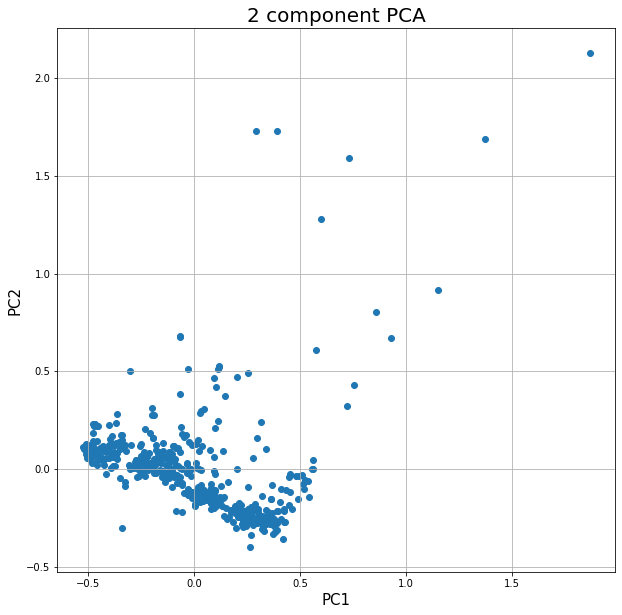

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(pca_DF_PY['PC1'], pca_DF_PY['PC2'])
ax.grid()

In [32]:
pca.explained_variance_ratio_

array([0.17962711, 0.13464631])

3. **PCA: 50, 80, 95% of Variance**

In [33]:
pca1 = PCA(n_components=0.50)
pca1.fit(norm_df_PY)
reduced = pca1.transform(norm_df_PY)
pca1.n_components_

5

In [34]:
pca2 = PCA(n_components=0.80)
pca2.fit(norm_df_PY)
reduced = pca2.transform(norm_df_PY)
pca2.n_components_

14

In [35]:
pca3 = PCA(n_components=0.95)
pca3.fit(norm_df_PY)
columns = ['PC_%i' % i for i in range(29)]
df_pca_PY  = pd.DataFrame(pca3.transform(norm_df_PY), columns=columns, index=norm_df_PY.index)

df_pca_PY.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28
0,0.418899,-0.357558,-0.026377,-0.131144,-0.032968,-0.081718,0.016675,0.021471,-0.122402,-0.071553,...,0.047641,-0.009761,0.103680,-0.025186,0.138025,0.182704,-0.038534,-0.054494,0.119385,-0.212100
1,1.869650,2.127615,-0.040043,-0.876978,2.548570,-0.566988,-0.256543,0.145501,0.056671,0.209180,...,-0.283810,0.158444,0.010711,0.087708,0.019307,-0.057269,0.049066,0.005671,-0.034579,-0.001865
2,1.149890,0.917276,-0.104190,-0.713989,0.997289,-1.313334,0.376520,-0.474709,-0.378628,-0.317488,...,0.447563,-0.125786,-0.107523,-0.107058,0.008559,0.064000,-0.080195,0.039450,0.030147,0.008849
3,1.371401,1.686675,0.101866,-0.047377,-0.832180,-0.562086,-0.219439,-0.206263,1.139733,0.232412,...,-0.169079,0.024377,0.414868,0.090983,-0.080332,-0.061578,-0.282526,-0.234075,0.097197,-0.094922
4,0.929629,0.672620,-0.001942,-0.327270,-0.034383,-0.458778,-0.462150,0.224637,0.277519,0.240813,...,0.126396,-0.288635,-0.060398,-0.393379,-0.045647,0.206796,0.166799,0.083144,-0.038591,0.186554


4. Add Y target column

In [36]:
df_pca_PY['Y'] = norm_df_LY[4]
df_pca_PY.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,Y
0,0.418899,-0.357558,-0.026377,-0.131144,-0.032968,-0.081718,0.016675,0.021471,-0.122402,-0.071553,...,-0.009761,0.103680,-0.025186,0.138025,0.182704,-0.038534,-0.054494,0.119385,-0.212100,0.000031
1,1.869650,2.127615,-0.040043,-0.876978,2.548570,-0.566988,-0.256543,0.145501,0.056671,0.209180,...,0.158444,0.010711,0.087708,0.019307,-0.057269,0.049066,0.005671,-0.034579,-0.001865,1.000000
2,1.149890,0.917276,-0.104190,-0.713989,0.997289,-1.313334,0.376520,-0.474709,-0.378628,-0.317488,...,-0.125786,-0.107523,-0.107058,0.008559,0.064000,-0.080195,0.039450,0.030147,0.008849,0.790343
3,1.371401,1.686675,0.101866,-0.047377,-0.832180,-0.562086,-0.219439,-0.206263,1.139733,0.232412,...,0.024377,0.414868,0.090983,-0.080332,-0.061578,-0.282526,-0.234075,0.097197,-0.094922,0.464807
4,0.929629,0.672620,-0.001942,-0.327270,-0.034383,-0.458778,-0.462150,0.224637,0.277519,0.240813,...,-0.288635,-0.060398,-0.393379,-0.045647,0.206796,0.166799,0.083144,-0.038591,0.186554,0.212968


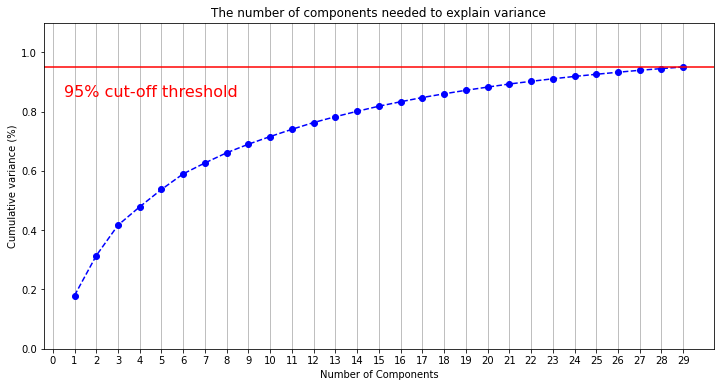

In [37]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 30, step=1)
y = np.cumsum(pca3.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')

#change from 0-based array index to 1-based human-readable label
plt.xticks(np.arange(0, 30, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

***5. Split train test***

In [235]:
from sklearn.model_selection import train_test_split
X = df_pca_PY.iloc[:, 0:29]
y = df_pca_PY.iloc[:, 29]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Linear Regression - Benchmark

In [236]:
import numpy as np
from sklearn.linear_model import LinearRegression

regr = LinearRegression(n_jobs = 2)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test) #predictions on test data
sc = regr.score(X_test, y_test)

***Linear Regression - Log-Scale Plot***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


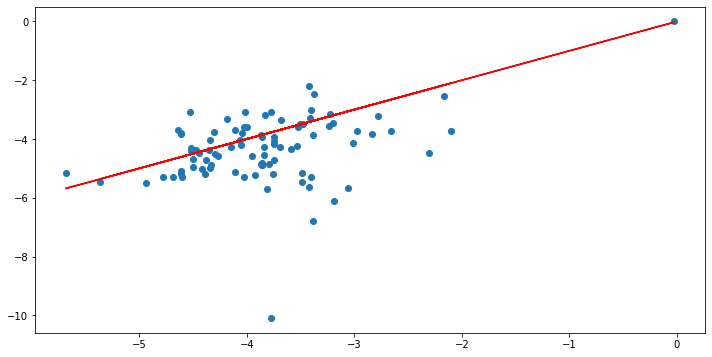

Accuracy: 0.9481084016771055


In [237]:
x = np.log(y_pred)
y = np.log(y_test)

plt.scatter(x, y)
plt.plot(x, x, color='red')
plt.show()
print('Accuracy: ' + str(sc))

#SVM - Regression - SVR

In [292]:
from sklearn.svm import SVR

svr = SVR(gamma='auto', C=1, epsilon=0.01)
svr.fit(X_train, y_train)
y_hat = svr.predict(X_test)
sc2 = svr.score(X_test, y_test)

***SVR - Log-Scale Plot***

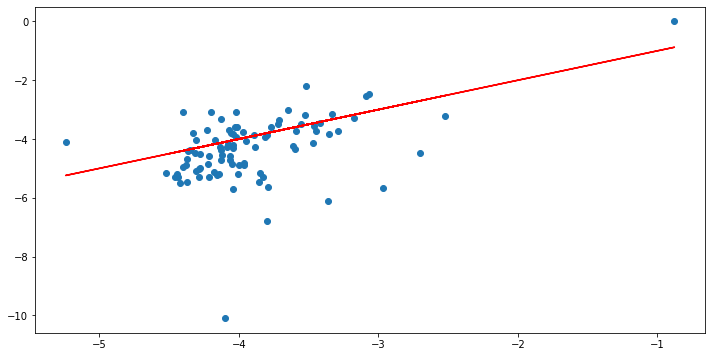

Accuracy: 0.6245002793017943


In [293]:
x = np.log(y_hat)
y = np.log(y_test)

plt.scatter(x, y)
plt.plot(x, x, color='red')
plt.show()
print('Accuracy: ' + str(sc2))